# Data distributions and sampling


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/delre/python/data/boston_precip_temp.csv')
df.head()


,station,name,date,temp,diurnal_temp_range,precip-total,snow-totals
0,USW00054704,"NORWOOD MEMORIAL AIRPORT, MA US",1,25.9,19.7,3.43,NaN
1,USW00054704,"NORWOOD MEMORIAL AIRPORT, MA US",2,28.9,21.0,3.25,NaN
2,USW00054704,"NORWOOD MEMORIAL AIRPORT, MA US",3,36.4,21.5,4.45,NaN
3,USW00054704,"NORWOOD MEMORIAL AIRPORT, MA US",4,46.8,22.7,4.19,NaN
4,USW00054704,"NORWOOD MEMORIAL AIRPORT, MA US",5,56.4,24.9,3.68,NaN


## Uniform distribution
One thing we are often concerned about in data analysis is the **distribution** of our data: the values of the samples we have, and how often those values occur. We often visualize distributions in a type of plot called a **histogram**.

Below, we generate data from a **uniform** distribution. A uniform distribution is one where all values are equally likely. In the example below, we create a sample of a uniform distribution between 0 and 10 using `np.random.uniform()`.

In this uniform distribution, values close to zero are just as likely as values close to 10 and all values in-between. 

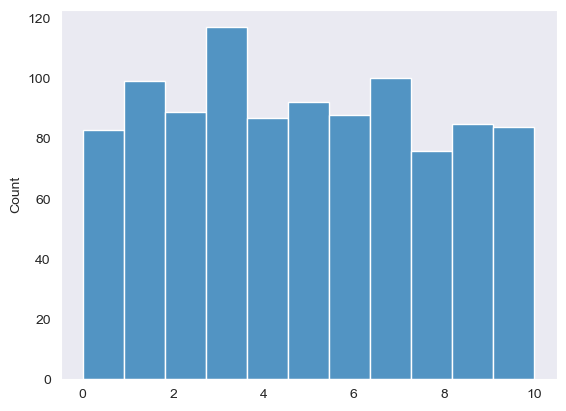

<Figure size 640x480 with 0 Axes>

In [4]:
uniform_data = np.random.uniform(0, 10, 1000) #each of the values 1-10 are equally likely to be selected when a random number is selected 1000 times
sns.set_style('dark')

sns.histplot(uniform_data)
plt.show() #No distinct mean or hump because everything from 1-10 is about equally likely to occur (random!)

plt.savefig('/Users/delre/python/data/new_plot.png') #This is how you SAVE files: just put path to where you want file



The uniform distrbution is straightforward to understand, and some variables you may be interested in follow it. For examples, in our Boston temperature and precipitation values, temperature is approximately **uniformly distributed**. 

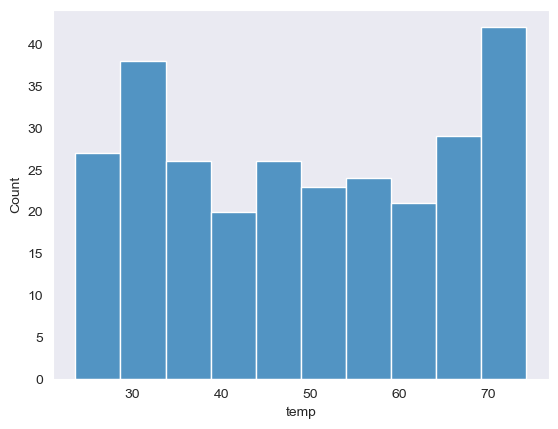

In [5]:
sns.histplot(data=df, x='temp')
plt.show()

## Normal distribution

The **normal distribution** is one of the most important types of distributions. Data that are normally distributed appear as a bell-shaped curve. 

The data is centered on a central value, which is the mean and median of the data. 

Values further from the mean are less common; these occupy the **tails** of the distribution.


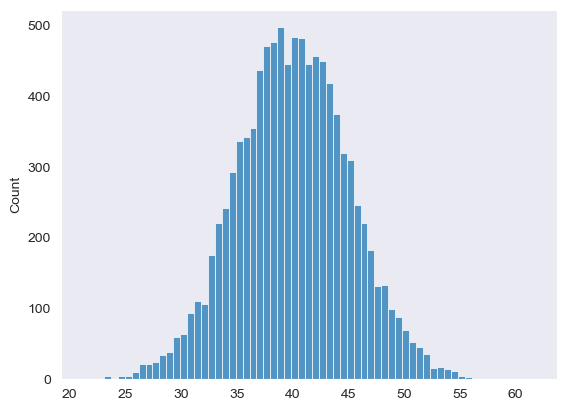

In [6]:
normal_data = np.random.normal(40, 5, 10000)
#Standard "bell curve" where most values focused on a mean value; less likely to have further values; symmetrical
#Code above has a MEAN of 40, a STANDARD DEVIATION of 5, and it is run 10,000 times (number of datapoints)
#Mode (most common value) will be right down the center of the figure

sns.histplot(normal_data)
plt.show()

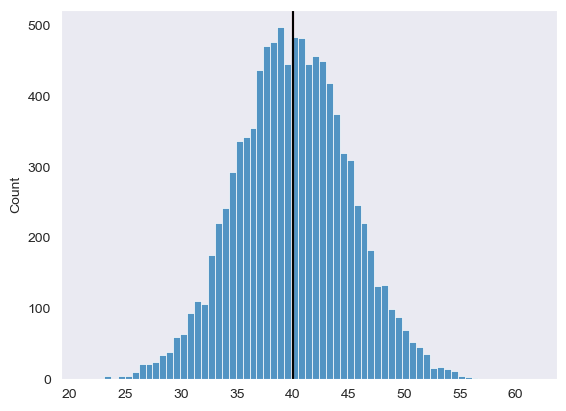

mean: 40.0435770353802
median: 40.00366525650395


In [7]:
#SHOW statistical analysis on figures
#Show mean and median on normal datapoints

mean_normal = np.mean(normal_data)
median_normal = np.median(normal_data)

sns.histplot(normal_data)
plt.axvline(x=mean_normal, color='red')
plt.axvline(x=median_normal, color='black')

plt.show()

print('mean:', mean_normal)
print('median:', median_normal)


The two most important values that define a particular normal distribution are the **mean** and **standard deviation** of the distribution. Standard deviation ($\sigma$) is a measure of the spread of data, and is calculated as the square root of the average difference between each data point and the mean:

$$ \sigma = \sqrt{\frac{\sum_{i=1}^N(x_i-\bar{x})^2}{N}}$$

In this equation, $N$ is the total number of samples, $x_i$ represents the values of a single sample, and $\bar{x}$ is the sample mean.

Approximately ⅔ of data (68%) lie within ±1 standard deviation of the mean, and ~95% lie within ±2 standard deviations.

Standard deviation is 5.022014678974729


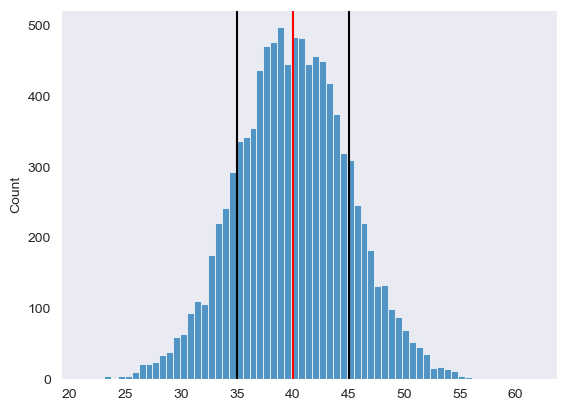

In [8]:
std_normal = np.std(normal_data)

sns.histplot(normal_data)
plt.axvline(x=mean_normal, color="red")
#About 2/3 of your data will be within 1 standard deviation of the mean

plt.axvline(x=mean_normal+std_normal, color='black')
plt.axvline(x=mean_normal-std_normal, color='black')
print('Standard deviation is',std_normal)
plt.show()

#95% of all data should be within two standard deviation of mean

**Variance** is another measurement of spread. It is simply the square of standard deviation. 

In [9]:
var_normal = np.var(normal_data)
#another measure of spread
#just the square of standard deviation
#not reported as often as standard deviation because it has fewer helpful properties
print("variance:", var_normal)

variance: 25.22063143583765


A lot of our numerical data will be normally distributed (though not as nice looking as the ones directly from numpy).

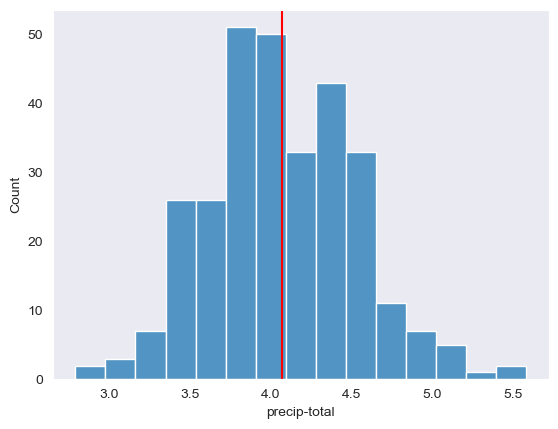

In [10]:
sns.histplot(df['precip-total'])
plt.axvline(np.mean(df['precip-total']), color='red')
plt.show()

### Question

Create a uniform distribution and visualize it with a histogram. Change the sample size and revisualize. What happens when you decrease the sample size? What happens when you increase it?

Now do the same thing for a normal distribution. What changes when you change the sample size? How close are the mean and standard deviation to the values you put into `np.random.normal()`?

<AxesSubplot:ylabel='Count'>

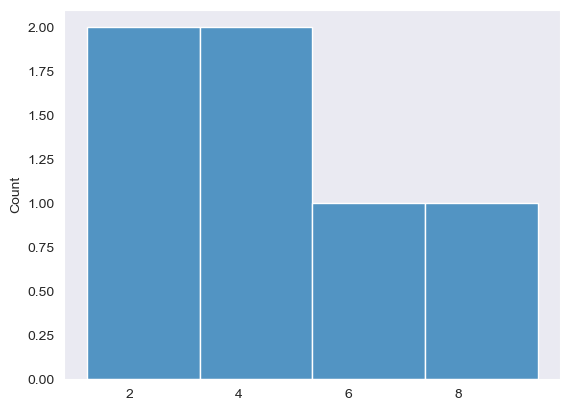

In [11]:
uniform = np.random.uniform(0, 10, 6)
sns.histplot(uniform)

## Skewed data
Not all data comes in a normal distribution. Sometimes, the distribution is **skewed**, where one of the tails of the distribution is longer than the other. In this case, the mean and median of our data will not be equal.

In [13]:
lognormal_data

lognormal_mean = np.mean(lognormal_data)
lognormal_median = np.median(lognormal_data)

sns.histplot(lognormal_data)
plt.axvline(x=lognormal_mean, color="red")
plt.axvline(x=lognormal_median, color="black")
plt.show()

print('mean:', lognormal_mean)
print('lognormal_median', lognormal_median)

NameError: name 'lognormal_data' is not defined

Having data normally distributed can be quite useful, and there are ways to transform skewed data to make them more normally distributed. A log transformation is a common way to do this: taking the base-10 logarithm of your data. This will be useful later when we talk about linear regression. 

In [ ]:
transformed_data

sns.histplot(transformed_data)
plt.show()

### Question

Make a histogram of the following data. Are these data normally distributed? Why or why not? If not, does log transforming help?

- `data/boston_precip_temp.csv`: 'diurnal_temp_range'
- `data/gapminder.csv`: 'population' 
- `data/boston_precip_temp.csv`: 'snow-totals' (remove all negative numbers first!)

c:\Users\delre\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


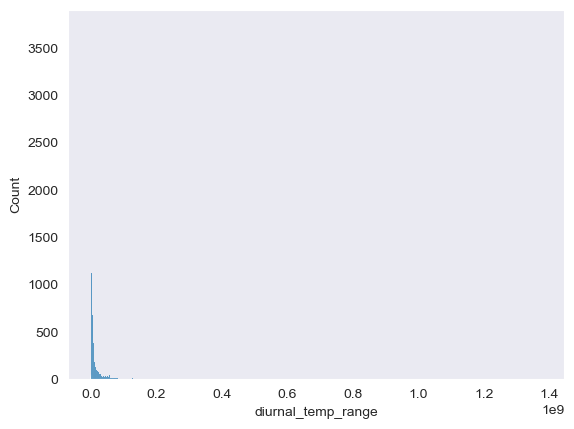

In [24]:
### your code here:
sns.histplot(df['diurnal_temp_range']) 
#Here you say you want a figure(dataframe[name of row]) 

gap = pd.read_csv('/Users/delre/python/data/gapminder.csv')
sns.histplot(gap['population'])

df_sub = df.loc[df['snow-totals']>=0,:]
sns.histplot(np.log10(df_sub['snow-totals']))

sns.histplot(np.sqrt(df_sub['snow-totals']))
plt.show()

## Sampling
When we acquire data, we are taking a sample of a larger **population**. A population is the entire group of entities we are interested in studying. This can be an actual human, animal or plant population, or it could be all of the factories in the US, or a body of water you are taking samples from. Every statistical question has a population of interest. 

Say our population is US factories and our value of interest is emissions made by each factory, which is normally distributed. There is a true value for the mean emissions for all US factories. However, if you collected information on only some of them, the mean number of that sample might be somewhat different from the overall mean just due to random chance. This is called **sampling error**. The larger our sample, the closer it should be to the actual mean.

We also want to make sure our sample is representative. For instance, a sample from all US states is more representative of the population than a sample only from Arkansas. If you do not have a representative sample, your sample mean may be far from the true mean, another source of sampling error. 

In [33]:
greater_than_1 = 0
greater_than_2 = 0

# take 10,000 sets of samples
for i in range(10000):

    x = np.random.normal(0,1,10)
    #Sometimes "sampling effect" means the MEAN will not be what you expect
    #If your sample is small or is not "representative" then you get further
    #and further from the "true mean"

    mean_x = np.mean(x)

    if abs(mean_x) > 2: #abs() calculates absolute value, np.abs also exists
        greater_than_1 += 1 #this adds 1 (one) each time
        greater_than_2 += 1

    elif abs(mean_x) > 1:
        greater_than_1 += 1
    

print('>2 SD:', (greater_than_2)/10000) 
#divide by 10,000 because there were 10,000 samples

print('>1 SD:', (greater_than_1)/10000)

>2 SD: 0.0
>1 SD: 0.0016


### Question

Using the code above for detecting possibility of sample error, change the standard deviation, sample size, and number of iterations. How does this affect the possibility of seeing samples with means that exceed 1 or 2?

In [58]:
greater_than_1 = 0
greater_than_2 = 0

n = 7500 #changed to a variable to make it easier to alter

for i in range(n):

    x = np.random.normal(0,1,10)
    mean_x = np.mean(x)

    if abs(mean_x) > 2: 
        greater_than_1 += 1
        greater_than_2 += 1

    elif abs(mean_x) > 1:
        greater_than_1 += 1
    

print('>2 SD:', (greater_than_2)/n) 
print('>1 SD:', (greater_than_1)/n)

#When you increase number, you get very close to mean (0 in this case)
#When you decrease number, you increase probability of seeing means further from 0

>2 SD: 0.0
>1 SD: 0.0014666666666666667


### Question

Create two random samples (100 values each) from a normal distribution with a mean of 100 and a standard deviation of 10. Visualize each as a distribution, displaying the mean by printing the value or putting a vertical line in the plot.

Do the two histograms looks approximately the same? Calculate the difference between the means of the two samples.

Re-run the code to get two different samples several times. How similar do the distributions look each time? How different are the means?

In [ ]:
### your code here:

### Bonus Question

Write your own custom function to calculate standard deviation from a list of numbers. Double check with the numpy version to see if you get the same values

In [ ]:
### your code hre